#### About dataset:
WHO has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
raw_data = pd.read_csv('framingham.csv')

In [3]:
raw_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Checking correlation with numerical values.

In [6]:
num_cols = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
num_data_corr = raw_data[num_cols]
num_data_corr.corr()*100

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,100.000000,-19.279085,26.213102,39.430154,20.610399,13.579957,-1.282300,12.225578
cigsPerDay,-19.279085,100.000000,-2.631986,-8.877953,-5.663246,-9.285600,7.515687,-5.895976
totChol,26.213102,-2.631986,100.000000,20.890779,16.518237,11.576679,9.112473,4.640793
sysBP,39.430154,-8.877953,20.890779,100.000000,78.400209,32.698058,18.224565,14.062110
diaBP,20.610399,-5.663246,16.518237,78.400209,100.000000,37.758766,18.125506,6.123138
BMI,13.579957,-9.285600,11.576679,32.698058,37.758766,100.000000,6.767843,8.737655
heartRate,-1.282300,7.515687,9.112473,18.224565,18.125506,6.767843,100.000000,9.450012
glucose,12.225578,-5.895976,4.640793,14.062110,6.123138,8.737655,9.450012,100.000000


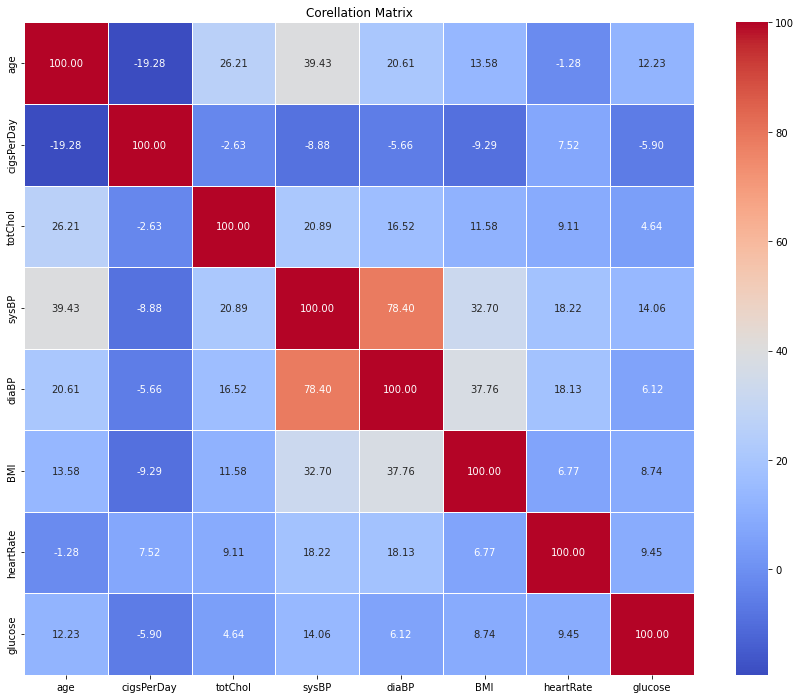

In [7]:
plt.figure(figsize=(15, 12)) 
sns.heatmap(num_data_corr.corr()*100, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corellation Matrix")
plt.show()

In [8]:
raw_data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Chi-square test for categorical data

In [9]:
cat_data = ['male', 'education', 'currentSmoker', 'BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']

In [10]:
table = pd.crosstab(raw_data['TenYearCHD'], [raw_data['male'], raw_data['education'], raw_data['currentSmoker'], raw_data['BPMeds'], 
                                               raw_data['prevalentStroke'], raw_data['prevalentHyp'], raw_data['diabetes']])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(table)
print("Chi-square test:")
print("Test statistic:", chi2_stat)
print("p Value:", p_value)
print("Degrees of freedom:", dof)
print("Expected value:", expected)

Chi-square test:
Test statistic: 363.15111423643697
p Value: 1.0833141913323968e-32
Degrees of freedom: 96
Expected value: [[2.95373529e+02 5.09264706e+00 1.79940196e+02 1.18828431e+01
  8.48774510e-01 2.54632353e+00 8.48774510e-01 1.61267157e+01
  1.69754902e+00 3.39509804e+00 1.88427941e+02 3.39509804e+00
  6.11117647e+01 3.39509804e+00 8.48774510e-01 7.63897059e+00
  8.48774510e-01 2.06252206e+02 1.69754902e+00 1.02701716e+02
  3.39509804e+00 1.69754902e+00 1.69754902e+01 1.69754902e+00
  2.35959314e+02 2.54632353e+00 5.43215686e+01 2.54632353e+00
  8.48774510e-01 9.33651961e+00 8.48774510e-01 1.61267157e+02
  8.48774510e-01 5.68678922e+01 5.09264706e+00 8.48774510e-01
  1.34106373e+02 2.54632353e+00 2.12193627e+01 3.39509804e+00
  8.48774510e-01 6.70531863e+01 1.86730392e+01 8.48774510e-01
  3.39509804e+00 6.02629902e+01 8.48774510e-01 1.27316176e+01
  1.69754902e+00 1.45989216e+02 5.94142157e+00 7.63897059e+01
  7.63897059e+00 8.48774510e-01 6.79019608e+00 8.48774510e-01
  8.48774

### Variable distribution

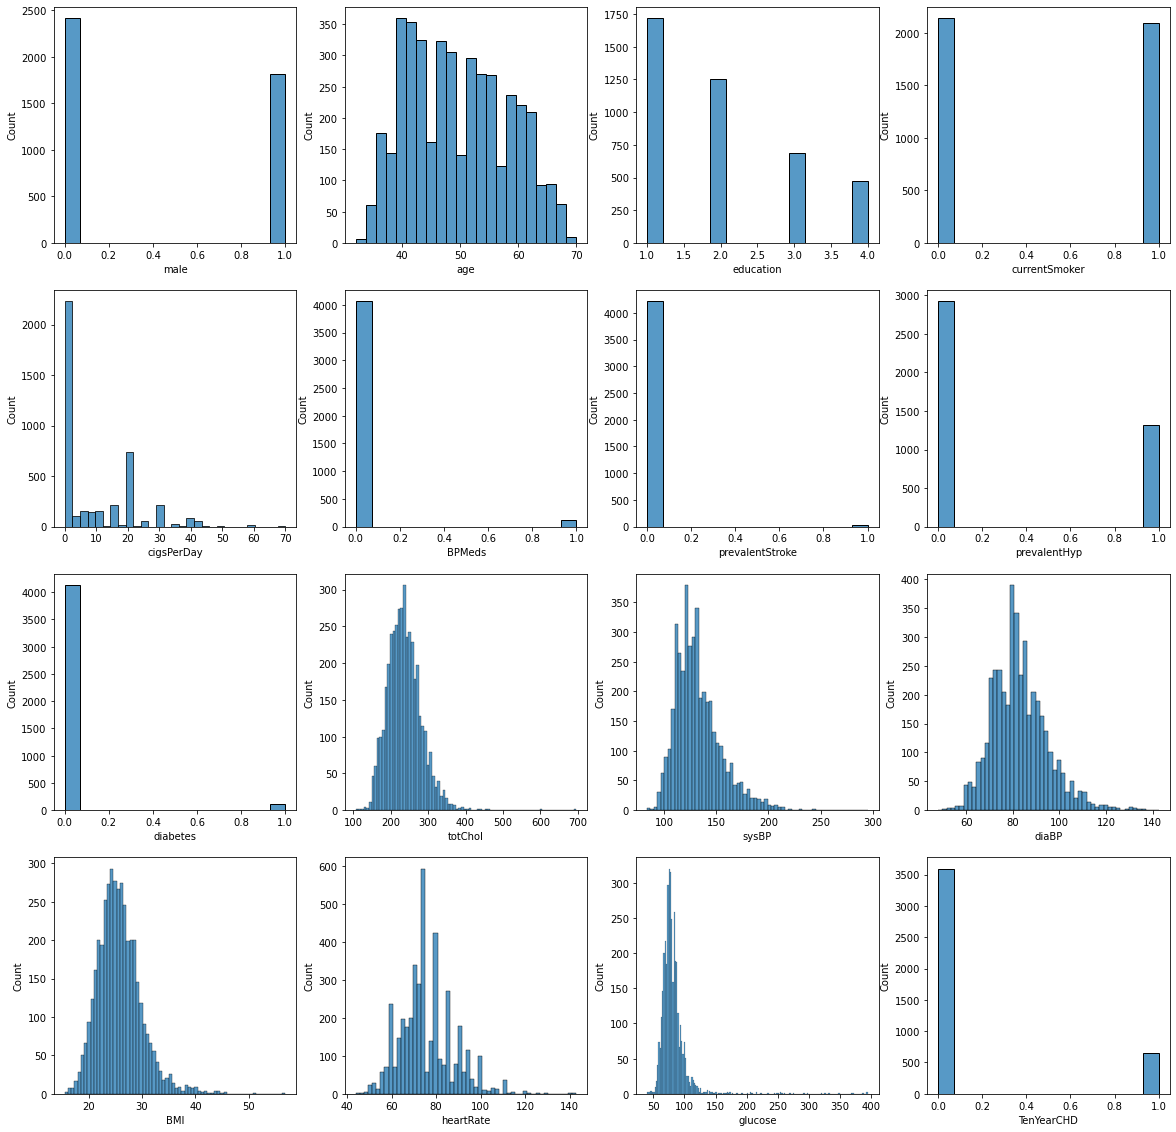

In [11]:
cols =['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.histplot(raw_data[cols[i-1]])

In [12]:
raw_data.groupby(by='TenYearCHD').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.410684,48.767668,2.002282,0.489983,8.710401,0.023367,0.003895,0.275737,0.019199,235.172530,130.333612,82.160963,25.673007,75.762382,80.682125
1,0.532609,54.145963,1.848726,0.517081,10.629283,0.064771,0.017081,0.504658,0.062112,245.388976,143.618789,86.981366,26.531451,76.530327,89.008418


In [13]:
raw_data['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

### Empty rows filling

In [14]:
raw_data.isnull().sum()[raw_data.isnull().sum()>0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

Comment: There are not many empty row so that media should be proper to fill missing value.

In [15]:
empty_data = raw_data.copy()

In [16]:
empty_cols = ['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']

In [17]:
for i in empty_cols:
    empty_data[i] = empty_data[i].fillna(empty_data[i].median())

In [18]:
filled_data = empty_data.copy()
filled_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [19]:
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### Checking if filling empty rows affected the data

#### Mean after filling empty rows

In [20]:
filled_data.groupby(by='TenYearCHD').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.410684,48.767668,2.002226,0.489983,8.644964,0.023094,0.003895,0.275737,0.019199,235.159154,130.333612,82.160963,25.672323,75.762382,80.429883
1,0.532609,54.145963,1.852484,0.517081,10.596273,0.063665,0.017081,0.504658,0.062112,245.229814,143.618789,86.981366,26.513882,76.527950,88.153727


#### Mean before filling empty rows

In [21]:
raw_data.groupby(by='TenYearCHD').mean()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.410684,48.767668,2.002282,0.489983,8.710401,0.023367,0.003895,0.275737,0.019199,235.172530,130.333612,82.160963,25.673007,75.762382,80.682125
1,0.532609,54.145963,1.848726,0.517081,10.629283,0.064771,0.017081,0.504658,0.062112,245.388976,143.618789,86.981366,26.531451,76.530327,89.008418


#### Chi-square test after filling empty rows

In [22]:
table_filled_data = pd.crosstab(filled_data['TenYearCHD'], [filled_data['male'], filled_data['education'], filled_data['currentSmoker'], filled_data['BPMeds'], 
                                               filled_data['prevalentStroke'], filled_data['prevalentHyp'], filled_data['diabetes']])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(table_filled_data)
print("Chi-square test:")
print("Test statistic:", chi2_stat)
print("p Value:", p_value)
print("Degrees of freedom:", dof)


Chi-square test:
Test statistic: 373.70296955942507
p Value: 2.10818162606035e-34
Degrees of freedom: 96


#### Chi-square test before filling empty rows

In [23]:
table = pd.crosstab(raw_data['TenYearCHD'], [raw_data['male'], raw_data['education'], raw_data['currentSmoker'], raw_data['BPMeds'], 
                                               raw_data['prevalentStroke'], raw_data['prevalentHyp'], raw_data['diabetes']])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(table)
print("Chi-square test:")
print("Test statistic:", chi2_stat)
print("p Value:", p_value)
print("Degrees of freedom:", dof)

Chi-square test:
Test statistic: 363.15111423643697
p Value: 1.0833141913323968e-32
Degrees of freedom: 96


Comment: The p-value is very small both before (1.083e-32) and after (2.108e-34) filling the data with the median. This means that there is a very strong statistical basis for rejecting the null hypothesis, i.e. the hypothesis that there is no relationship between the analyzed variables. The difference in p-value between the two cases may be due to slight changes in the distribution of the data due to median filling.

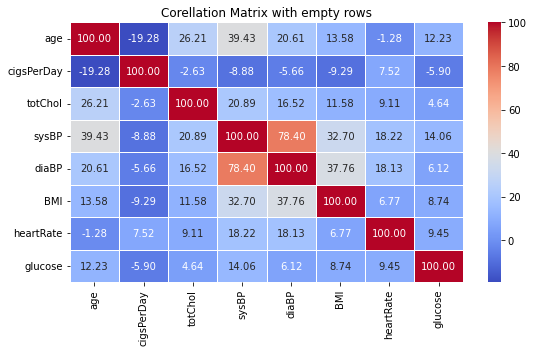

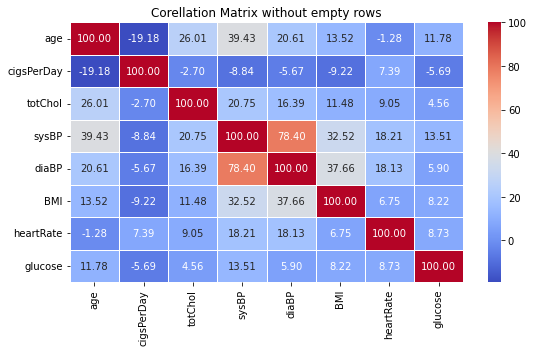

In [24]:
num_cols = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
num_data_corr = raw_data[num_cols]
num_data_corr.corr()*100

plt.figure(figsize=(8, 5)) 
sns.heatmap(num_data_corr.corr()*100, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corellation Matrix with empty rows")
plt.tight_layout()
plt.show()

num_cols_filled = ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
num_data_corr_filled = filled_data[num_cols_filled]
num_data_corr_filled.corr()*100

plt.figure(figsize=(8, 5)) 
sns.heatmap(num_data_corr_filled.corr()*100, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corellation Matrix without empty rows")
plt.tight_layout()
plt.show()

Comment: There was no significant change in the correlation between numerical data after filling in the missing data with the median.

### Outliers detection

[Text(1, 0, 'male'),
 Text(2, 0, 'age'),
 Text(3, 0, 'education'),
 Text(4, 0, 'currentSmoker'),
 Text(5, 0, 'cigsPerDay'),
 Text(6, 0, 'BPMeds'),
 Text(7, 0, 'prevalentStroke'),
 Text(8, 0, 'prevalentHyp'),
 Text(9, 0, 'diabetes'),
 Text(10, 0, 'totChol'),
 Text(11, 0, 'sysBP'),
 Text(12, 0, 'diaBP'),
 Text(13, 0, 'BMI'),
 Text(14, 0, 'heartRate'),
 Text(15, 0, 'glucose'),
 Text(16, 0, 'TenYearCHD')]

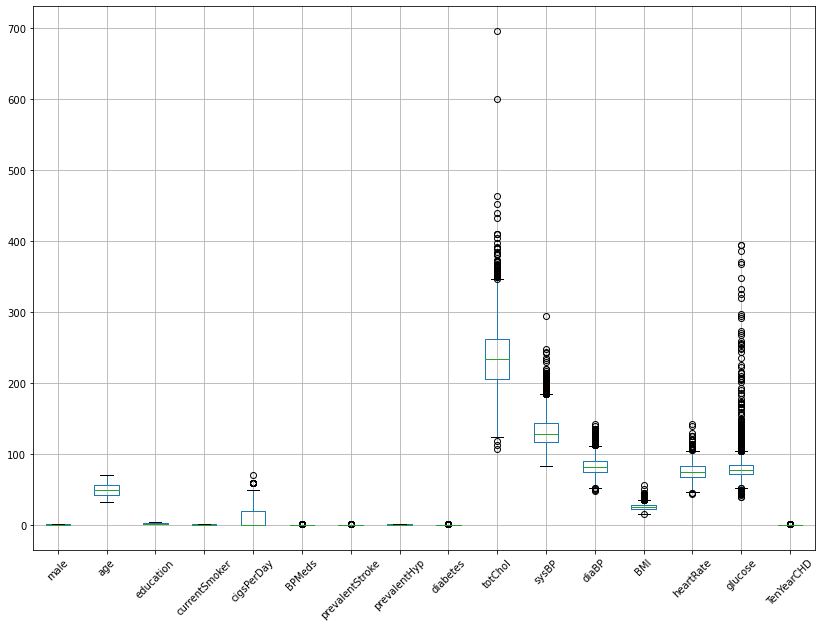

In [25]:
box_chart = filled_data.boxplot(figsize=(14,10),fontsize=10)
box_chart.set_xticklabels(box_chart.get_xticklabels(), rotation=45)

In [26]:
outlier_cols = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [27]:
def remove_outliers(data, columns, threshold=1.5):
    """
    Removes outliers from multiple columns in a Pandas DataFrame using the IQR method.
    
    Parameters:
    data (pd.DataFrame): Input data containing columns with outliers to be removed.
    columns (list): List of column names to remove outliers from.
    threshold (float): IQR threshold, default is 1.5.
    
    Returns:
    pd.DataFrame: Dataframe with outliers removed.
    """
    
    filtered_data = data.copy()
    
    for column in columns:
        Q1 = filtered_data[column].quantile(0.25)
        Q3 = filtered_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        filtered_data = filtered_data[(filtered_data[column] >= lower_bound) & (filtered_data[column] <= upper_bound)]
    
    return filtered_data

In [28]:
cleaned_data=remove_outliers(filled_data,outlier_cols)

In [29]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3630 entries, 0 to 4236
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3630 non-null   int64  
 1   age              3630 non-null   int64  
 2   education        3630 non-null   float64
 3   currentSmoker    3630 non-null   int64  
 4   cigsPerDay       3630 non-null   float64
 5   BPMeds           3630 non-null   float64
 6   prevalentStroke  3630 non-null   int64  
 7   prevalentHyp     3630 non-null   int64  
 8   diabetes         3630 non-null   int64  
 9   totChol          3630 non-null   float64
 10  sysBP            3630 non-null   float64
 11  diaBP            3630 non-null   float64
 12  BMI              3630 non-null   float64
 13  heartRate        3630 non-null   float64
 14  glucose          3630 non-null   float64
 15  TenYearCHD       3630 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 482.1 KB


[Text(1, 0, 'male'),
 Text(2, 0, 'age'),
 Text(3, 0, 'education'),
 Text(4, 0, 'currentSmoker'),
 Text(5, 0, 'cigsPerDay'),
 Text(6, 0, 'BPMeds'),
 Text(7, 0, 'prevalentStroke'),
 Text(8, 0, 'prevalentHyp'),
 Text(9, 0, 'diabetes'),
 Text(10, 0, 'totChol'),
 Text(11, 0, 'sysBP'),
 Text(12, 0, 'diaBP'),
 Text(13, 0, 'BMI'),
 Text(14, 0, 'heartRate'),
 Text(15, 0, 'glucose'),
 Text(16, 0, 'TenYearCHD')]

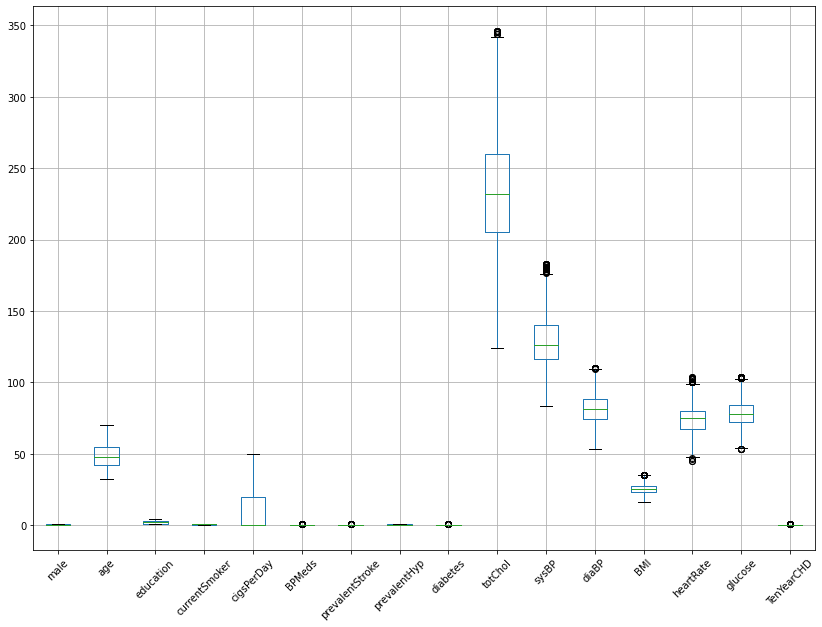

In [30]:
box_chart_cleaned = cleaned_data.boxplot(figsize=(14,10),fontsize=10)
box_chart_cleaned.set_xticklabels(box_chart_cleaned.get_xticklabels(), rotation=45)

In [31]:
cleaned_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Checking the distribution in the data after removing outliers

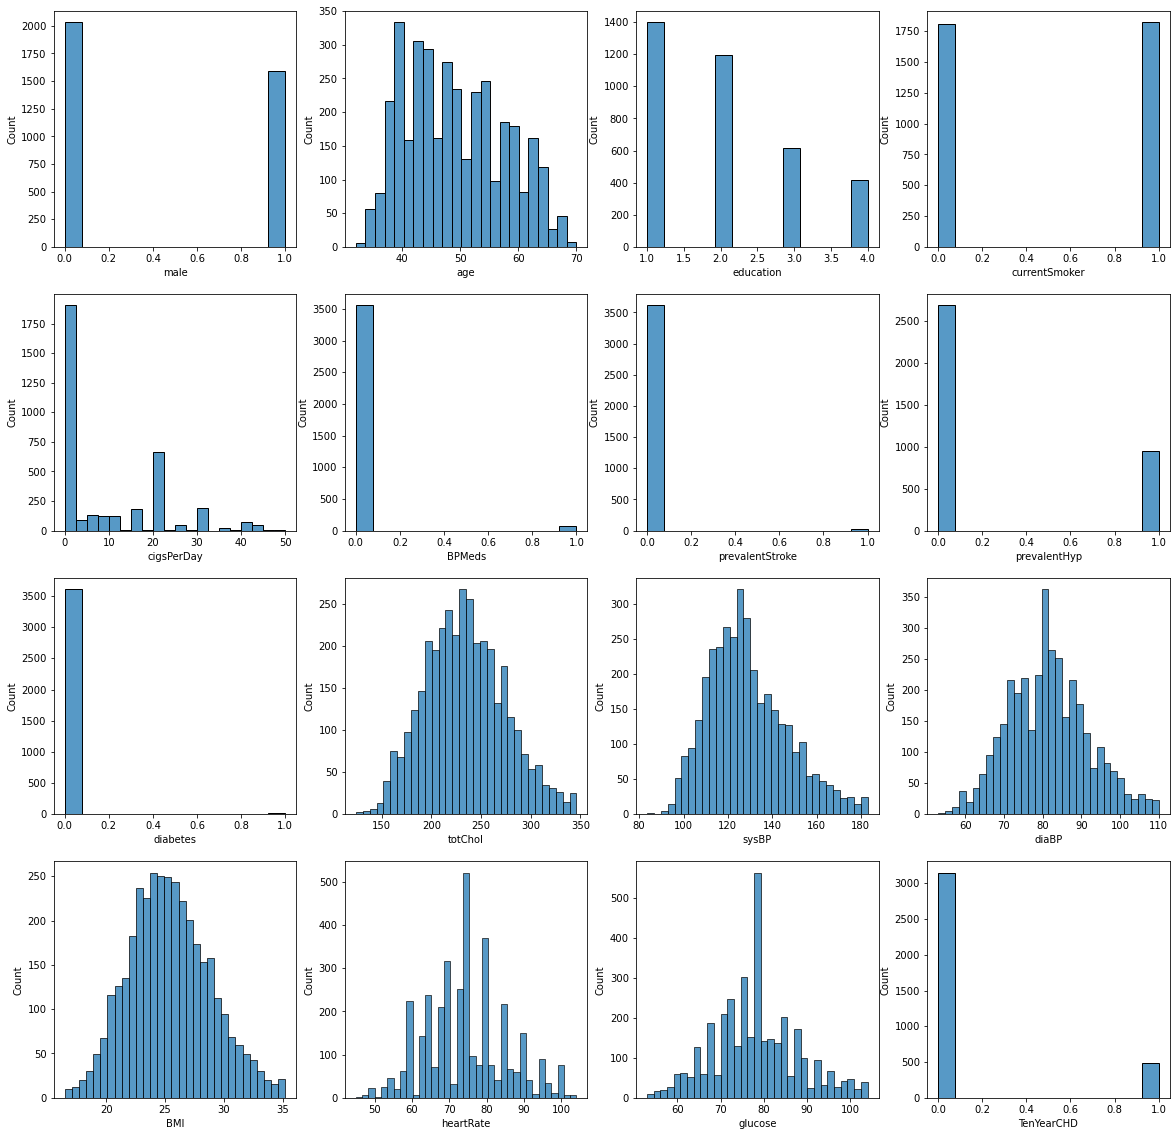

In [32]:
cols_rem_outs =['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
plt.figure(figsize=(20,20))
for i in range(1,17):
    plt.subplot(4,4,i)
    sns.histplot(cleaned_data[cols_rem_outs[i-1]])

Comment: After removing the outliers, the data distribution became more symmetrical.

### Split data at test and train

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
data_model = cleaned_data.copy()

In [35]:
X = data_model
y = data_model.pop('TenYearCHD')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
print(f'Train set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')
print(f'Target train set size: {y_train.shape}')
print(f'Target test size: {y_test.shape}')

Train set size: (2541, 15)
Test set size: (1089, 15)
Target train set size: (2541,)
Target test size: (1089,)


### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
model_log_reg = LogisticRegression(max_iter=10000)

In [39]:
model_log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [40]:
y_pred = model_log_reg.predict(X_test)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy ", accuracy*100)

Model accuracy  87.05234159779614


In [42]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [43]:
cm = confusion_matrix(y_test, y_pred)

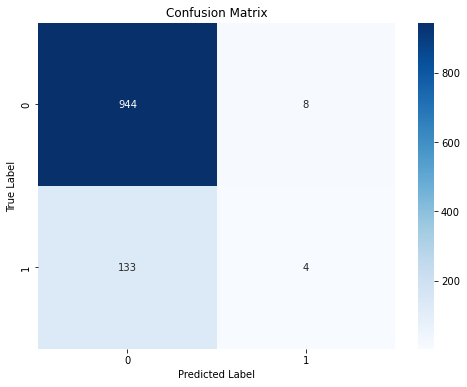

In [44]:
plot_confusion_matrix(cm)

In [45]:
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       952
           1       0.33      0.03      0.05       137

    accuracy                           0.87      1089
   macro avg       0.60      0.51      0.49      1089
weighted avg       0.81      0.87      0.82      1089



Comment: We have a large number of class 0 (negative) samples correctly classified, indicating a good ability of the model to identify negative cases.
However, we have a low number of class 1 (positive) samples correctly classified, suggesting that the model has difficulty identifying positive cases.
There is also a significant number of Class 0 samples misclassified as Class 1 (92 cases), which may indicate the occurrence of false positives.

#### Logistic regression optimization - GridSearchCV

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {
    'C': [0.1, 1.0, 2.0, 3.0, 5.0, 10.0], 
    'solver': ['lbfgs', 'liblinear', 'sag'],
    'max_iter' : [10000,15000,100000]
    
}

In [ ]:
grid_search = GridSearchCV(model_log_reg, param_grid, cv=5)

grid_search.fit(X, y)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X, y)
print("Accuracy: ", accuracy)

In [ ]:
y_pred_opt = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_opt)

plot_confusion_matrix(cm)

In [ ]:
print(classification_report(y_test,y_pred, zero_division=1))

Comment: After applying GridSearchCV, the result is still a low number of correctly classified class 1 (positive) samples.

#### Logistic regression optimization - RandomUnderSampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)

X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)


In [ ]:
model_undersampler = LogisticRegression(max_iter=10000)

model_undersampler.fit(X_train_undersampled, y_train_undersampled)

y_pred = model_undersampler.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Model accuracy ", accuracy*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm)

In [ ]:
print(classification_report(y_test,y_pred, zero_division=1))

Comment: After using RandomUnderSampler, the result of the model's predictions regarding classification to class 1 (positive) improved, while the model began to cope worse with predictions to class 0 and the accuracy of the model significantly decreased.

### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 600],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}


In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

print("Best value: ", grid_search.best_score_)

In [ ]:
y_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [ ]:
print(classification_report(y_test,y_pred, zero_division=1))

comment: Values for class 1 indicate that the model is unable to correctly classify samples of this class because recall and f1-score are 0.0. This is a situation where the model does not correctly recognize a single class 1 sample.

In general, for class 0 the model performs well, but for class 1 it is inefficient. This may be due to an unbalanced dataset or lack of appropriate features to effectively classify Class 1 samples.

#### Random Forest optimization - SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [ ]:
grid_search.fit(X_train_oversampled, y_train_oversampled)

# Wykonanie predykcji na danych testowych
y_pred = grid_search.predict(X_test)

In [ ]:
print("Best parameters: ", grid_search.best_params_)

print("Best value: ", grid_search.best_score_)

In [ ]:
y_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [ ]:
print(classification_report(y_test,y_pred, zero_division=1))

Comment: The use of smote optimization slightly improved the model's prediction of class 0. In conclusion, the model has a high precision for class 0, which means that it correctly classifies most cases as negative. However, for class 1, the model has low accuracy and sensitivity, which means it has difficulty identifying positive cases.